# Statistika Inferensial

Pengambilan kesimpulan / prediksi / hipotesis

In [2]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Resampling

Resampling adalah suatu metode yang memungkinkan kita melakukan sampling dari data sampel, sehingga seolah-olah data hasil penelitian tersebut merupakan populasi. Resampling dalam statistik berarti berulang kali sampel nilai dari data yang diaamti, dengan tujuan umum menilai variabilitas acak dalam statistik. Contoh pada data dibawah ini merupakan harga perumahan di distribusi data Amsterdam.

In [3]:
house_price = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Additional-Materials/main/HousingPrices-Amsterdam-August-2021.csv')
house_price.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


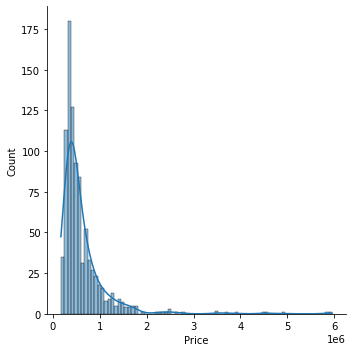

In [4]:
sns.displot(house_price.Price, kde=True, label='Housing Price in Amsterdam')

In [5]:
house_price.Price.sample(400) # sampel price diambil secara acak

447    310000.0
813    800000.0
756    315000.0
497    575000.0
366    430000.0
         ...   
578    325000.0
94     325000.0
192    335000.0
223    395000.0
692    700000.0
Name: Price, Length: 400, dtype: float64

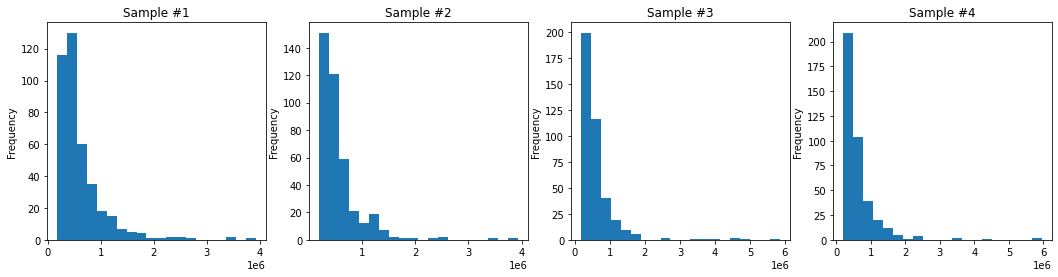

In [6]:
# Resampling
fig,ax = plt.subplots(ncols=4, figsize = (18,4))
for i in range(4):
  house_price.Price.sample(400).plot(kind='hist',bins=20,ax=ax[i])
  ax[i].set_title('Sample #{}'.format(i+1))

Kita ambil 100 sampel secara acak dari data harga rumah dan kita lakukan itu sebanyak 4 kali. Visualisasi menunjukkan bahwa distribusi mereka terlihat sama. Itu terjadi hanya karena keacakan (randomness)

## Uji Hipotesis

proses yang menggunakan statistik sampel untuk menguji klaim tentang nilai parameter populasi. Para peneliti mengandalkan pengujian hipotesis untuk membuat keputusan yang tepat.

- Null hypothesis (H0) adalah statistik yang berisi pernyataan kesetaraan (equality). Operasinya : >=, =, =>

- Alternative hypothesis (Ha) adalah komplemen dari null hypotesis. Operasinya : >, !=, <

## Implementasi ke Analisis Kampanye Pasar

In [7]:
data = pd.read_excel('https://github.com/fahmimnalfrzki/Additional-Materials/blob/main/online_retail_data.xlsx?raw=true').drop(columns='Unnamed: 0').sort_values('InvoiceDate',ascending=True).reset_index(drop=True)

data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom
1,536373,82482,WOODEN PICTURE FRAME WHITE FINISH,6,2010-12-01 09:02:00,2.10,17850.0,United Kingdom
2,536398,22752,SET 7 BABUSHKA NESTING BOXES,6,2010-12-01 10:52:00,8.50,13448.0,United Kingdom
3,536401,85150,LADIES & GENTLEMEN METAL SIGN,1,2010-12-01 11:21:00,2.55,15862.0,United Kingdom
4,536404,20727,LUNCH BAG BLACK SKULL.,10,2010-12-01 11:29:00,1.65,16218.0,United Kingdom
...,...,...,...,...,...,...,...,...
9995,581501,22942,CHRISTMAS LIGHTS 10 SANTAS,12,2011-12-09 10:46:00,2.95,12985.0,United Kingdom
9996,581572,22627,MINT KITCHEN SCALES,4,2011-12-09 12:08:00,8.50,16705.0,United Kingdom
9997,581578,21507,ELEPHANT BIRTHDAY CARD,12,2011-12-09 12:16:00,0.42,12713.0,Germany
9998,581579,23353,6 GIFT TAGS VINTAGE CHRISTMAS,12,2011-12-09 12:19:00,0.83,17581.0,United Kingdom


In [8]:
data['StockCode'].value_counts()

85099B    43
85123A    40
47566     40
22423     36
20725     31
          ..
22053      1
22483      1
22103      1
84558A     1
79190A     1
Name: StockCode, Length: 2402, dtype: int64

## Pengujian Hipotesis Sampel Tunggal

Misalkan selama lima tahun terakhir, pendapatan harian kami rata-rata $500 dan selama setahun terakhir, kami mencapai rata-rata $580 sehari. Apakah itu berarti bahwa kami meningkat secara signifikan?

In [9]:
data['income'] = data['Quantity']*data['UnitPrice']
data['date'] = data['InvoiceDate'].dt.date #hanya dimunculkan tahun-bulan-tanggal
daily_income = data[['date','income']].groupby('date').sum()
print('Averange Income a Day for the last a year: ${}'.format(np.round(daily_income['income'].mean())))


Averange Income a Day for the last a year: $580.0


Untuk mengecek apakah penjualan kami meningkat secara signifikan atau tidak, kami akan melakukan sampel tunggal satu sisi dan menetapkan tingkat signifikansi 0,05. Kami menggunakan metode ini karen akami hanya menguji variabel dan membandingkan sampel (data satu taahun terakhir) dan populasi (menggangap itu adalah data lima tahun terakhir).

Hipotesis :

**H0: μ <= \$500**

**H1: μ > \$500**

In [10]:
daily_income

,income
date,
2010-12-01,1000.20
2010-12-02,846.13
2010-12-03,924.86
2010-12-05,592.83
2010-12-06,1853.98
...,...
2011-12-05,1574.18
2011-12-06,1006.74
2011-12-07,467.56


In [11]:
# cari nilai T statistik dan nilai P
t_stat, p_val = stats.ttest_1samp(daily_income.income, 500) # kasus 1 sampel
print('P-value:',p_val/2) # kita butuh 1 tail aja, makanya P di bagi 2
print('t-staistics:', t_stat)

P-value: 0.002874549060119239
t-staistics: 2.781482852334568


C:\Users\Acer Nitro 5\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


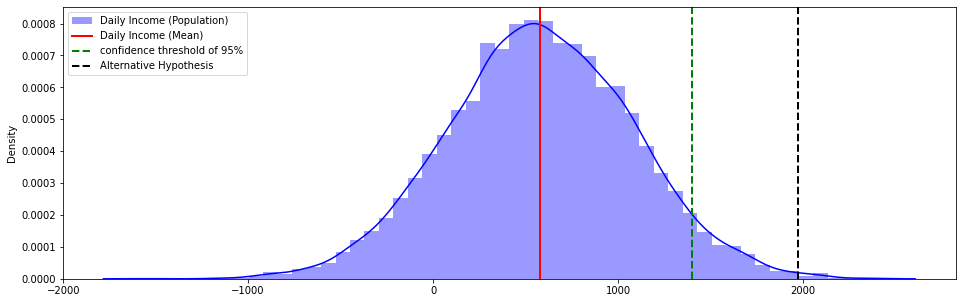

In [12]:
daily_income_pop = np.random.normal(daily_income.income.mean(), daily_income.income.std(), 10000) # nilainya harus lebih besar dari sampel daily income (305 rows).

ci = stats.norm.interval(0.90, daily_income.income.mean(), daily_income.income.std()) # one tailed 1 - (2*cv), cv = critical values

plt.figure(figsize=(16,5))
sns.distplot(daily_income_pop, label='Daily Income (Population)', color='blue')
plt.axvline(daily_income.income.mean(), color='red', linewidth=2, label='Daily Income (Mean)')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(daily_income_pop.mean() + t_stat*daily_income_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()

P-value kurang dari dari 0.05, maka null hypothesis ditolak dan menyimpulkan bahwa, penjualan selama setahun terakhir meningkat daripada lima tahun terakhir.

Catatan: T-statistik mengacu pada seberapa jauh hipotesis alternatif dari hipotesis nol.

## One Sample Two Tailed

Our hypothesis on this case:

**H0: μ =$500**

**H1: μ != $500**

In [13]:
t_stat,p_val = stats.ttest_1samp(daily_income.income, 500)
print('P-value :', p_val) # two tailed
print('t-statistics :', t_stat)

P-value : 0.005749098120238478
t-statistics : 2.781482852334568


C:\Users\Acer Nitro 5\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


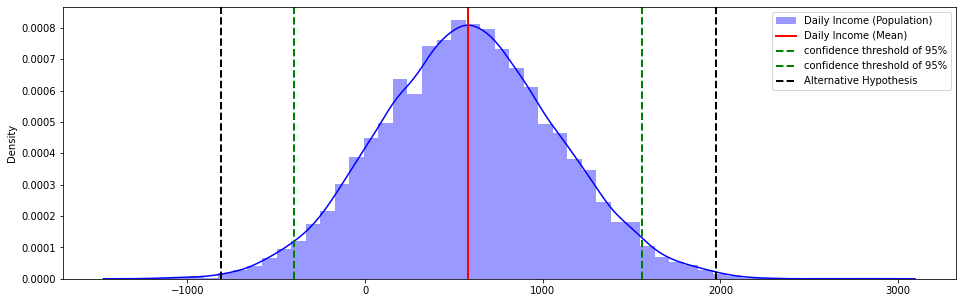

In [14]:
daily_income_pop = np.random.normal(daily_income.income.mean(), daily_income.income.std(), 10000)

ci = stats.norm.interval(0.95, daily_income.income.mean(), daily_income.income.std())

plt.figure(figsize=(16,5))
sns.distplot(daily_income_pop, label='Daily Income (Population)', color='blue')
plt.axvline(daily_income.income.mean(), color='red', linewidth=2, label='Daily Income (Mean)')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(daily_income_pop.mean() + t_stat*daily_income_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(daily_income_pop.mean() - t_stat*daily_income_pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

## Dua Sampel Pengujian Hipotesis Dua Tailed Independen

Sekarang, kami ingin memeriksa, apakah rata-rata harian penjualan dua negara berbeda secara signifikan atau tidak menggunakan dua sampel uji dua arah yang independen. Kami akan memilih sampel Perancis dan Jerman.

In [15]:
daily_france = data[data['Country']=='France'][['date', 'income']].groupby('date').sum()
daily_germany = data[data['Country']=='Germany'][['date', 'income']].groupby('date').sum()

print('Averange sales of France a day: ${}'.format(np.round(daily_france.income.mean())))
print('Average sales of Germany a day: ${}'.format(np.round(daily_germany.income.mean())))

Averange sales of France a day: $32.0
Average sales of Germany a day: $37.0


Hipotesis di kasus ini: 

**H0: μ_france = μ_germany**


**H1: μ_france != μ_germany**

In [16]:
t_stat, p_val = stats.ttest_ind(daily_france,daily_germany)
print('P-value:', p_val[0]) #two-tailed
print('t-statistics:', t_stat[0])

P-value: 0.42798052232930384
t-statistics: -0.7943449043302956


C:\Users\Acer Nitro 5\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Acer Nitro 5\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


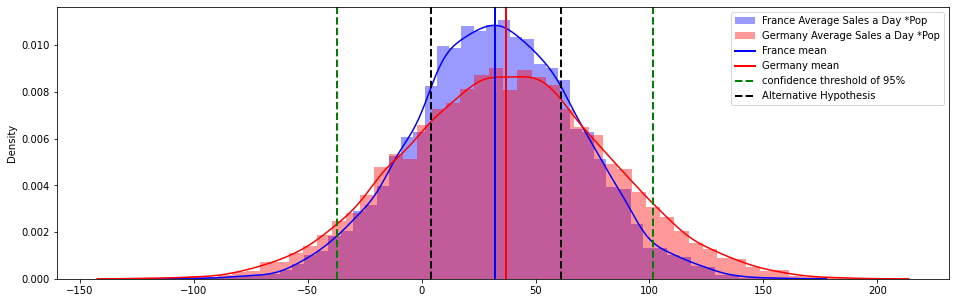

In [17]:
france_pop = np.random.normal(daily_france.income.mean(),daily_france.income.std(),10000)
germany_pop = np.random.normal(daily_germany.income.mean(),daily_germany.income.std(),10000)

ci = stats.norm.interval(0.95, daily_france.income.mean(), daily_france.income.std())
plt.figure(figsize=(16,5))
sns.distplot(france_pop, label='France Average Sales a Day *Pop',color='blue')
sns.distplot(germany_pop, label='Germany Average Sales a Day *Pop',color='red')

plt.axvline(daily_france.income.mean(), color='blue', linewidth=2, label='France mean')
plt.axvline(daily_germany.income.mean(), color='red',  linewidth=2, label='Germany mean')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)

plt.axvline(france_pop.mean()+t_stat[0]*france_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(france_pop.mean()-t_stat[0]*france_pop.std(), color='black', linestyle='dashed', linewidth=2)

plt.legend()

Berdasarkan hasil di atas, kami dapat menyimpulkan bahwa kami menerima hipotesis nol bahwa antara Perancis dan Jerman tidak berbeda secara signifikan dalam hal penjualan rata-rata per hari.

P-value = 0.42, rata-rata penjualan di perancis = 0.32 dan rata-rata penjualan di Jerman = 0.37, p-value lebih besar dari rata-rata penjualan perancis maupun di jerman makanya null hypothesis diterima

## Statistical significance

mengacu pada apakah perbedaan data yang diamati antara kelompok data yang dipelajari (apakah 'real' atau apakah mereka hanya karena kebetulan).

Signifikansi statistik dihitung menggunakan nilai p, yang menujukkan besarnya probablitas hasil penelitian, dengan syarat pernyataan tertentu (H0) adalah benar.

Jika nilai p kurang dari tingkat signifikansi (alpha) uang telah ditentukan (umumnya 0.05), peneliti dapat menyimpulkan bahwa hipotesis nol tidak benar dan menerima hipotesis alternatif.

## T-test

merupakan salah satu jenis uji statistik parametrik yang digunakan untuk menguji signifikansi dan relevansi dalam satu atau dua kelompok.

## Test kiri / kanan atau Tes dua sisi

jika H0 memiliki tanda "=" di dalamnya, itu berarti mengatakan itu adalah penguji "dua sisi/ two tailed".

Uji dua sisi digunakan untuk menguji apakah rata2 yang diamati sama dengan mean yang dihipotesiskan.

uji satu sisi digunakan untuk menguji apakah rata2 diamati secara signifikan melebihi rata2 yang dihipotesiskan atau jika secara signifikan lebih kecil daripada rata2 yang dihipotesiskan. Jika Ha memiliki tanda "<" didalamnya maka Ha adalah tes arah kiri. tanda ">", Ha adalah tes arah kanan.

## Statistical Significance (T Test)

langkah pertama menganalissi signifikansi statistik adalah menentukan pertanyaan penelitian yang ingin anda jawab dan merumuskan hipotesis anda. Hipotesis adalah pernyataan tentang data eksperimen anda dan menerangan perbedaan yang mungkin ada di dalam populasi penelitian.

- Hipotesis nol (H0) umumnya menyatakan bahwa tidak ada perbedaan antara dua kelompok data.

- Hipotesis alternatif (Ha) adalah pernyataan yang berlawanan dengan hipotesis nol dan pernyataan yang anda coba dukung dengan data experiment.

langka kedua, batasi tingkat signifikansi untuk menentukan harus seberapa unik data anda agar data tsb dianggap signifikan.

- sebagai aturan umum, tingkat signifikansi (alfa) ditetapkan sebesar 0.05, berarti probabilitas kedua kelompok data tsb sama hanya 5%

## Anova

digunakan untuk menentukan apakah ada perbedaan yang signifikan secara statistik antara rata2 tiga atau lebih kelompok independen (tidak terkait). ANOVA dapat digunakan untuk perbandingan antara beberapa grup.

ANOVA mirip dgn T-test. Digunakan untuk menguji apakah lebih dari dua variabel berbeda nyata atau tidak. Jadi kami akan menguji apakah rata-rata penjualan harian IEV, N8U, dan U5F berbeda nyata atau tidak.

In [18]:
scanner_data = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Additional-Materials/main/scanner_data.csv')
scanner_data

,Unnamed: 0,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,02/01/2016,2547,1,X52,0EM7L,1.0,3.13
1,2,02/01/2016,822,2,2ML,68BRQ,1.0,5.46
2,3,02/01/2016,3686,3,0H2,CZUZX,1.0,6.35
3,4,02/01/2016,3719,4,0H2,549KK,1.0,5.59
4,5,02/01/2016,9200,5,0H2,K8EHH,1.0,6.88
...,...,...,...,...,...,...,...,...
131701,131702,04/07/2016,20203,32900,IEV,FO112,3.0,6.46
131702,131703,04/07/2016,20203,32900,N8U,I36F2,1.0,4.50
131703,131704,04/07/2016,20203,32900,U5F,4X8P4,1.0,5.19
131704,131705,04/07/2016,20203,32900,0H2,ZVTO4,1.0,4.57


In [19]:
scanner_data.groupby('Date').sum()

,Unnamed: 0,Customer_ID,Transaction_ID,Quantity,Sales_Amount
Date,,,,,
01/02/2016,3923150,1620617,1896805,482.75,4341.46
01/03/2016,7432990,1616766,3579179,497.00,4436.42
01/04/2016,14016165,4846347,6867307,553.00,4637.34
01/05/2016,7644374,1820535,3779664,217.00,1514.17
01/06/2016,19708741,5149729,9793228,572.66,4750.01
...,...,...,...,...,...
31/05/2016,19960359,5266971,9915835,522.00,4186.64
31/07/2016,16666761,1896920,4742452,169.00,1341.96
31/08/2016,24788181,4674456,13660542,477.67,3955.78


In [20]:
IEV_quantity = scanner_data[scanner_data.SKU_Category == 'IEV'].groupby('Date').sum()['Quantity']
N8U_quantity = scanner_data[scanner_data.SKU_Category == 'N8U'].groupby('Date').sum()['Quantity']
U5F_quantity = scanner_data[scanner_data.SKU_Category == 'U5F'].groupby('Date').sum()['Quantity']

print("Daily Average of IEV",IEV_quantity.mean())
print("Daily Average of N8U",N8U_quantity.mean())
print("Daily Average of U5F",U5F_quantity.mean())

Daily Average of IEV 22.915254237288135
Daily Average of N8U 33.46556473829201
Daily Average of U5F 22.610340909090908


In [21]:
f_stat, p_value = stats.f_oneway(IEV_quantity, N8U_quantity, U5F_quantity)
print('P-Value', p_value)
print('F-statistic',f_stat)

P-Value 6.049412282955515e-36
F-statistic 87.58717185385068


Statistik F didasarkan pada rasio varians di seluruh rata-rata kelompok. Semakin tinggi rasio ini, semakin signifikan secara statistik hasilnya. 


## Paired Test

Implementasi pada pengujian A/B adalah cara untuk membandingkan dua versi variabel tunggal, biasaanya dengan menguji respon subjek terhadap varian A terhadap varian B, dan menentukan mana dari dua varian yang lebih efektif.

Example :

Kami sedang berurusan dengan divisi pemasaran perusahaan pengembang game untuk menganalisis versi game mana yang cenderung memberikan lebih banyak tingkat retensi? Benarkah kita mengupgrade game kita dari versi gate 30 ke gate 40? (Data from https://www.kaggle.com/yufengsui/mobile-games-ab-testing) Kami akan menggunakan data retention_1 yang menangkap informasi bahwa pemain kembali dan bermain 1 hari setelah menginstal.

In [22]:
cookie_cats = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Additional-Materials/main/cookie_cats.csv')
cookie_cats

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [23]:
gate_30 = cookie_cats[cookie_cats['version']== 'gate_30']['retention_1'].replace({True:1, False:0})
gate_40 = cookie_cats[cookie_cats['version']== 'gate_40']['retention_1'].replace({True:1, False:0})

print('Retention rate of gate 30 version:', gate_30.sum()/gate_30.count()) #cari rata2
print('Retention rate of gate 40 version:', gate_40.sum()/gate_40.count())

Retention rate of gate 30 version: 0.4481879194630872
Retention rate of gate 40 version: 0.44228274967574577


In [24]:
gate_30

0        0
1        1
6        0
11       0
13       1
        ..
90179    1
90180    0
90182    1
90183    0
90186    1
Name: retention_1, Length: 44700, dtype: int64

In [25]:
gate_40

2        1
3        0
4        1
5        1
7        0
        ..
90181    1
90184    1
90185    0
90187    1
90188    0
Name: retention_1, Length: 45489, dtype: int64

Tingkat retensi antara versi tersebut sedikit berbeda. Apakah perbedaannya benar-benar sama atau karena kebetulan?

Untuk memastikan hasil kami, kami akan memeriksa menggunakan uji berpasangan dua sisi.

Hipotesis kami tentang kasus:

**H0: μ_gate30 = μ_gate40**

**H1: μ_gate30 != μ_gate40**

In [26]:
t_stat,p_val = stats.ttest_rel(gate_30.sample(40000),gate_40.sample(40000)) #we take 40000 sample of each data to make the size the same.
print('P-value:', p_val)

P-value: 0.02271449765213496


P-value lebih dari 0.05, kami memutuskan bahwa kami menerima Hipotesis nol yang berarti antara versi gate 30 dan 40 adalah sama. Kami dengan aman meningkatkan game kami ke versi gate 40.

## Chi Square

salah satu cara yang digunakan untuk menyampaikan atau menunjukkan keberadaan hubungan (ada atau tidaknya) antara variabel kategori yang diteliti.

Misalkan kita sebagai peneliti hendak melakukan uji terhadap perilaku mahasiswa. Karakter yang akan diuji adalah perilaku mahasiswa yang dikategorikan menjadi dua kategori. Kategori tersebut adalah mahasiswa yang mendukung program kampus dan acuh terhadap program kampus.

Kondisi tersebut memungkinkan kita untuk melakukan uji hipotesis mengenai perbedaan perilaku mahasiswa tersebut dilihat dari frekuensinya.

- 𝐻0: Dalam populasi, dua variabel kategoris tidak terkait
- 𝐻a: Dalam populasi, kedua variabel kategoris terkait


In [27]:
chi_df=pd.read_csv('https://raw.githubusercontent.com/yug95/MachineLearning/master/Hypothesis%20testing/chi-test.csv')
chi_df

,Gender,Like Shopping?
0,Male,No
1,Female,Yes
2,Male,Yes
3,Female,Yes
4,Female,Yes
5,Male,Yes
6,Male,No
7,Female,No
8,Female,No


In [28]:
contigency_table = pd.crosstab(chi_df['Gender'],chi_df['Like Shopping?']) #kita pisahkan isi dari like shopping (yes/no) dan gender (male/female)
contigency_table

Like Shopping?,No,Yes
Gender,,
Female,2,3
Male,2,2


In [29]:
stat, p, dof, expected = stats.chi2_contingency(contigency_table)
print('p=%3f' % (p))
if p > 0.05:
    print('Probably independen')
else:
    print('Probably dependen')

p=1.000000
Probably independen
